In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# path = '2019-11-22_19-07-57_その1.txt'
path = '2019-11-22_19-15-11_その2.txt'

In [3]:
# A1が筋電位、A2が心電図、A3が皮膚電気活動
columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"]
sampling_rate = 1000

df = None
reader = pd.read_csv(path, sep='\t', header=None, names=columns, index_col=False, chunksize=600*sampling_rate)
for r in reader:
    if df is None:
        #  頭から3行目は要らない
        df = r.drop([i for i in range(3)])
    else:
        df = df.append(r, ignore_index=True)
        
df = df.reset_index(drop=True)

print(df.shape)
df.head()

(485250, 11)


/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nSeq,I1,I2,O1,O2,A1,A2,A3,A4,A5,A6
0,0,0.0,0.0,0.0,0.0,510.0,497.0,102.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,509.0,499.0,102.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,509.0,499.0,102.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,506.0,500.0,102.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,505.0,501.0,102.0,0.0,0.0,0.0


In [4]:
target='A2'
df_target = df[target][10500:11500]
# df_target = df[target][450000:460000]

In [5]:
# plt.figure(figsize=(30, 10), dpi=100)
# plt.plot(df[target][450000:460000])

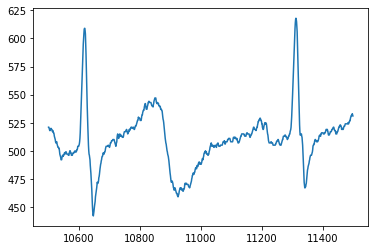

In [6]:
plt.plot(df_target)

# ARモデル

In [7]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

In [8]:
# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(df_target, regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(df_target, regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(df_target, regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(df_target, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-5.068487871471147, 0.0007814190675780347, 12, 987, {'1%': -4.382907946995653, '5%': -3.8383864295126875, '10%': -3.5569733008709474}, 2904.8459506750846)
ct:
(-5.004794495176949, 0.00020164986188992963, 12, 987, {'1%': -3.967971661746561, '5%': -3.4149475497389377, '10%': -3.1296737078728354}, 2903.494114520011)
c:
(-4.926513062910688, 3.0958710980776224e-05, 12, 987, {'1%': -3.4369927443074353, '5%': -2.864472756705845, '10%': -2.568331546097238}, 2902.306454450379)
nc:
(-0.20110132286311413, 0.6135012216123483, 8, 991, {'1%': -2.567999798122558, '5%': -1.9412744336703807, '10%': -1.6165547253491828}, 2923.9209815513977)


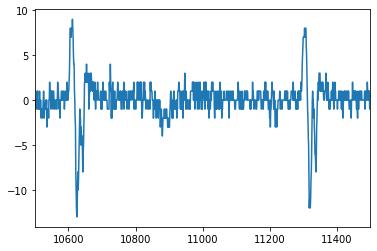

In [9]:
y_diff = df_target.diff().dropna()
y_diff.plot()

In [10]:
y_diff.count()

999

In [11]:
ctt = stattools.adfuller(y_diff, regression="ctt")
ct = stattools.adfuller(y_diff, regression="ct")
c = stattools.adfuller(y_diff, regression="c")
nc = stattools.adfuller(y_diff, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-9.359590242186925, 1.5755355588596897e-13, 7, 991, {'1%': -4.382860256751456, '5%': -3.8383621734339877, '10%': -3.5569582904019383}, 2924.541832161086)
ct:
(-9.363886979541268, 5.5529235531363746e-14, 7, 991, {'1%': -3.967934402399965, '5%': -3.41492951994395, '10%': -3.129663101346273}, 2922.5504151462956)
c:
(-9.364638709724835, 7.658526961245186e-16, 7, 991, {'1%': -3.4369658620871286, '5%': -2.8644609013346485, '10%': -2.56832523159495}, 2920.5523998078297)
nc:
(-9.369646564378469, 2.5202690477950716e-16, 7, 991, {'1%': -2.567999798122558, '5%': -1.9412744336703807, '10%': -1.6165547253491828}, 2918.5652821715557)


In [12]:
model = ar_model.AR(y_diff)
for i in range(20):
    results = model.fit(maxlag=i+1)
    print('lag = ', i+1, 'aic : ', results.aic)

lag =  1 aic :  0.2244206422275231
lag =  2 aic :  0.19059094926881556
lag =  3 aic :  0.18718563839082497
lag =  4 aic :  0.17405757629573615
lag =  5 aic :  0.1691704580906278
lag =  6 aic :  0.1676990604597196
lag =  7 aic :  0.1552200490071276
lag =  8 aic :  0.15429744807078905
lag =  9 aic :  0.154404032042926
lag =  10 aic :  0.15730187858483358
lag =  11 aic :  0.15550832339489315
lag =  12 aic :  0.15513169457209974
lag =  13 aic :  0.15812117925604463
lag =  14 aic :  0.15766719830899623
lag =  15 aic :  0.15950407074877895
lag =  16 aic :  0.16125868942020377
lag =  17 aic :  0.16191146995416827
lag =  18 aic :  0.16102472134417506
lag =  19 aic :  0.1612119592008614
lag =  20 aic :  0.16190526089444005


/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<BarContainer object of 991 artists>

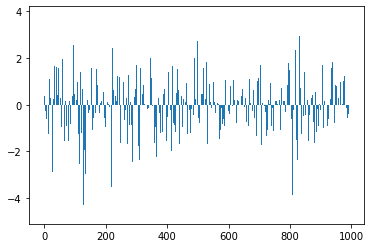

In [13]:
# モデルのあてはめ
# AICの結果からmaxlag=12としてラグは11
results11 = model.fit(maxlag=12, ic='aic')
# 残差
res11 = results11.resid
# 残差の出力
plt.bar(range(len(res11)), res11)

In [14]:
results11.k_ar

8

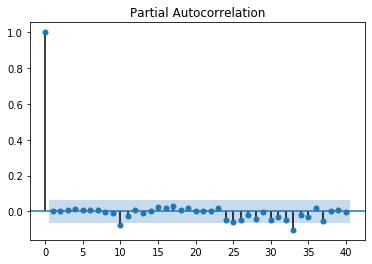

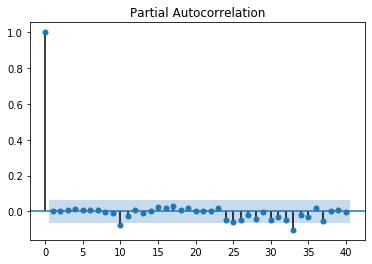

In [15]:
# 偏自己相関
tsaplots.plot_pacf(res11, lags=40)

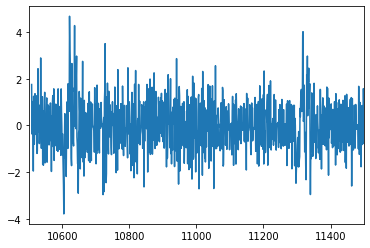

In [16]:
(results11.predict() - y_diff).plot()

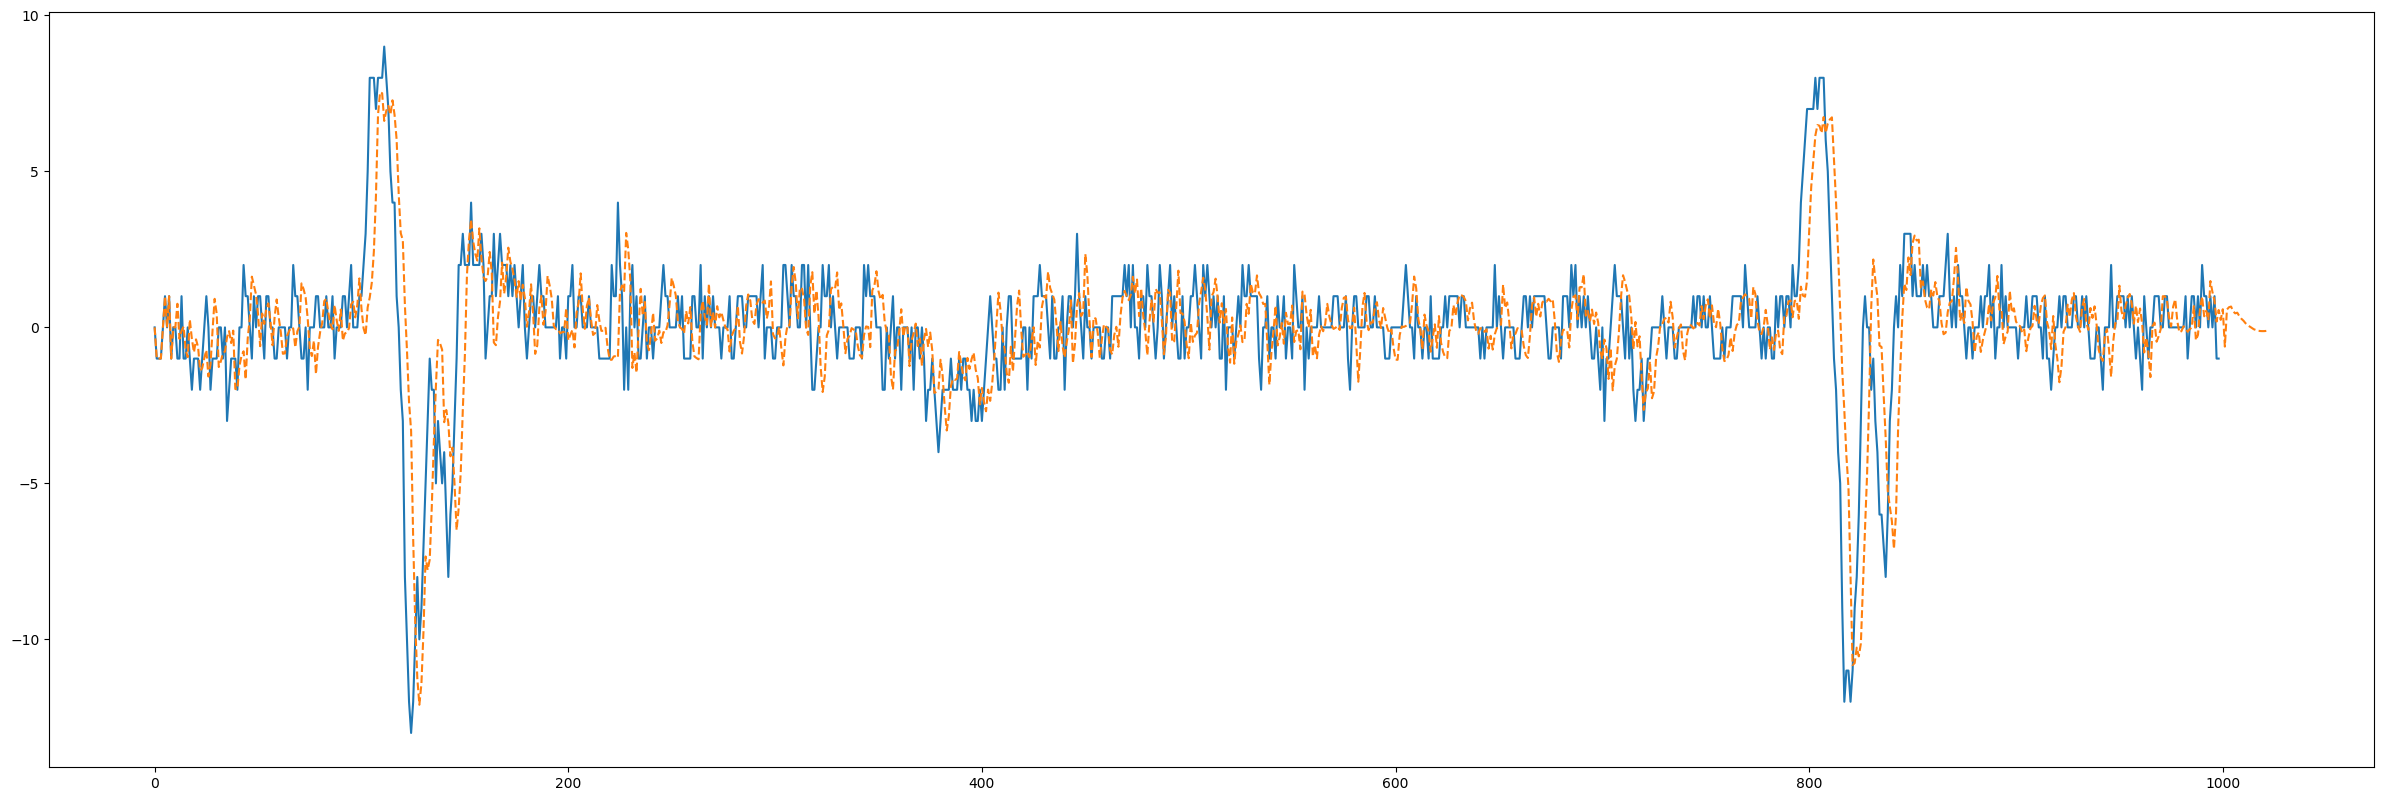

In [17]:
plt.figure(figsize=(30, 10), dpi=100)
# 将来予測
# 原系列の表示
plt.plot(df_target.diff().dropna().values, label="observation")
# 1時点から11時点の原系列、モデルの当てはめに使用したデータ、
# AR(11)モデルによる推定値を連結した結果の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack((y_diff[:11], 
                    results11.fittedvalues, 
                    results11.predict(98-11, 107, dynamic=True))), 
    '--', label="forecast")

# ARMAモデル

In [18]:
from statsmodels.tsa.arima_model import ARMA

In [19]:
# 次数選択の指標にAICとBICを選択
info_criteria = stattools.arma_order_select_ic(y_diff, ic=['aic', 'bic'])
# AICとBICが最小になる次数をそれぞれ表示
info_criteria.aic_min_order, info_criteria.bic_min_order

((4, 2), (2, 2))

/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<BarContainer object of 999 artists>

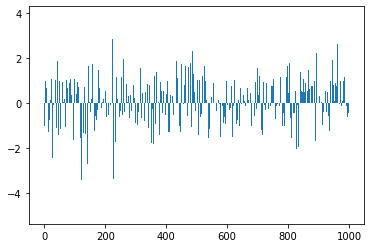

In [20]:
# p=4, q=2のARMAモデルのインスタンスを生成
model = ARMA(y_diff, (4, 2))
# y_diffに対してモデルを当てはめる
results = model.fit()
# 残差の抽出
res = results.resid
# 残差の出力
plt.bar(range(len(res)), res)

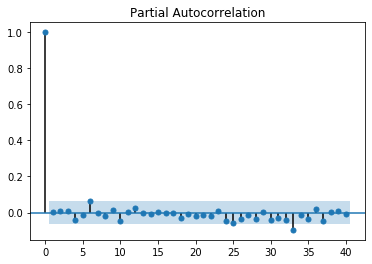

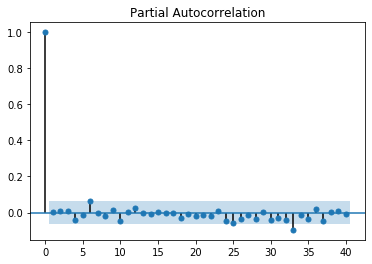

In [21]:
# 偏自己相関
tsaplots.plot_pacf(res, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

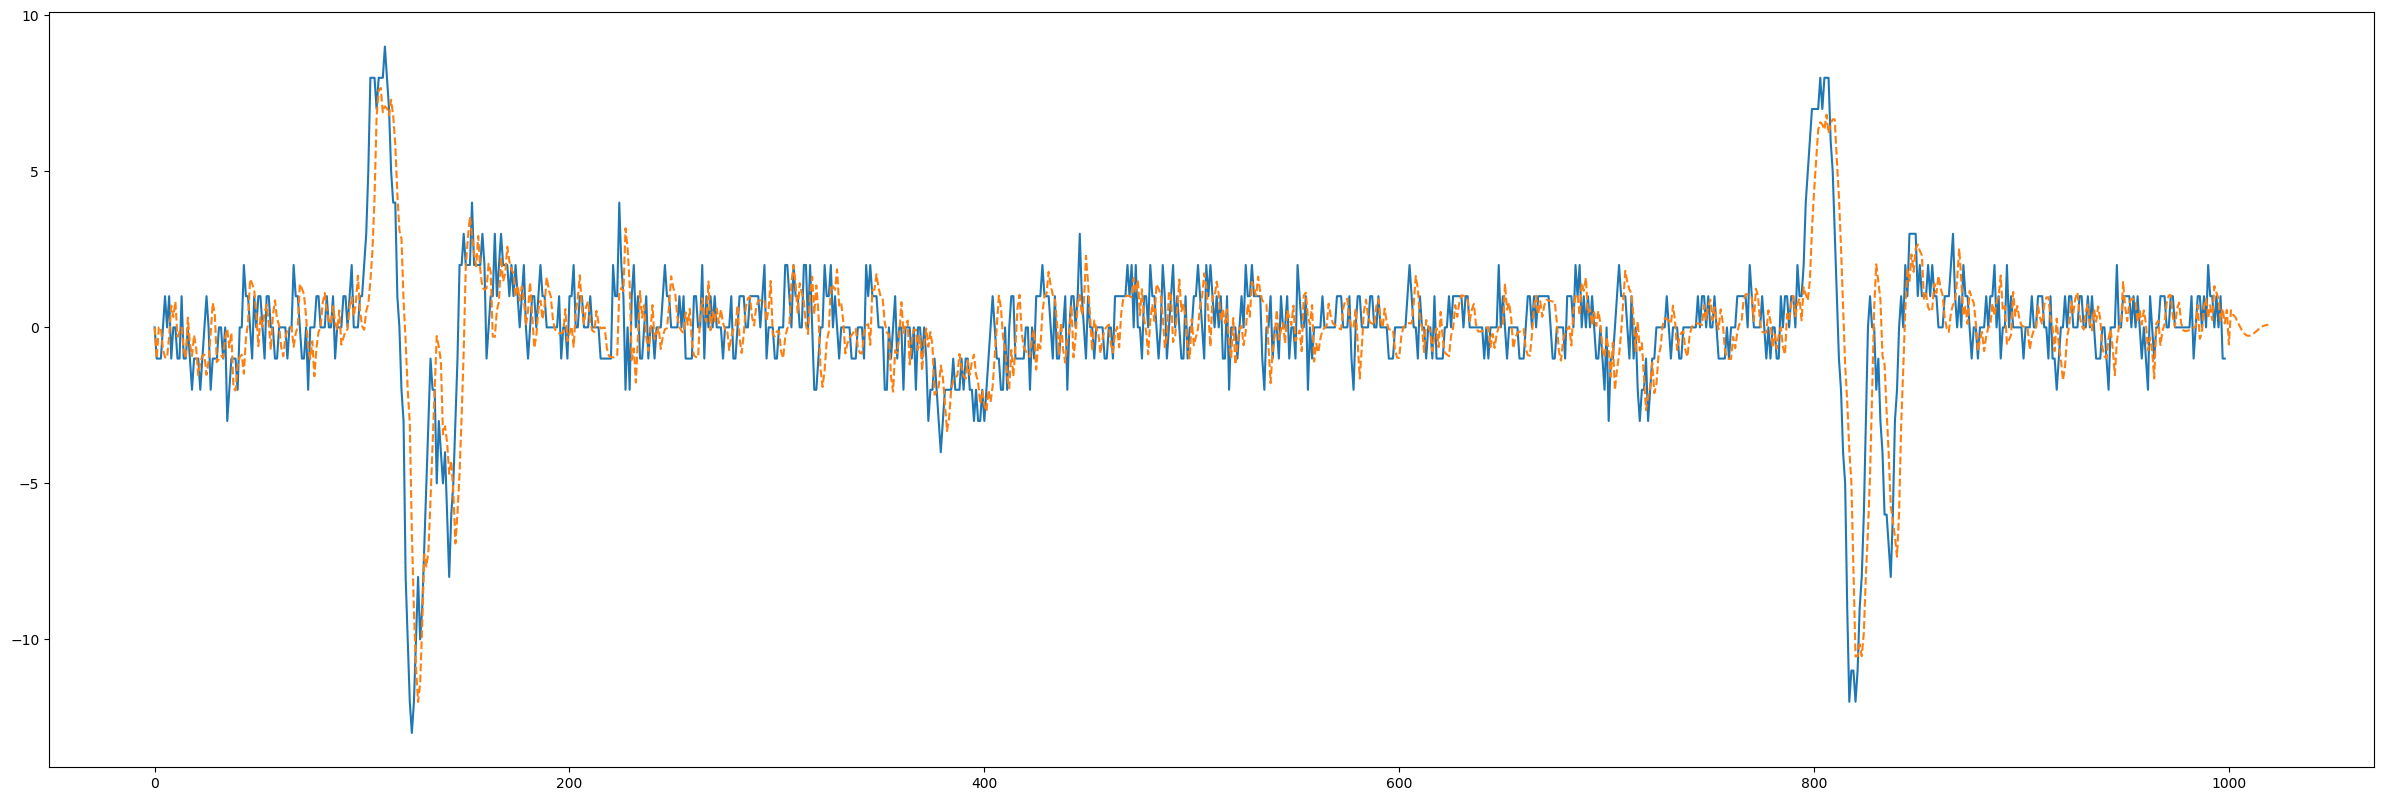

In [22]:
plt.figure(figsize=(30, 10), dpi=100)
# 1次階差系列の表示
plt.plot(df_target.diff().dropna().values, label="observation")
# ARMA(4, 2)による推定値の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack([y_diff[:2], 
                    results.fittedvalues, 
                    results.predict(99-2, 115, dynamic=True)]), 
         '--', label="forecast")

# ARIMAモデル

In [23]:
from statsmodels.tsa.arima_model import ARIMA

/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<BarContainer object of 999 artists>

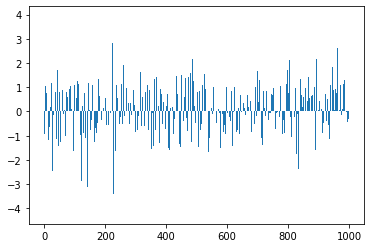

In [31]:
# 階差をとらないモデル(p=3,d=0,q=2)
# p=3だとダメなのでARモデルから出た結果を使う
model_d0 = ARIMA(df_target, (results11.k_ar, 0, 2))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid
# 残差の出力
plt.bar(range(len(res_d0[1:])), res_d0[1:])

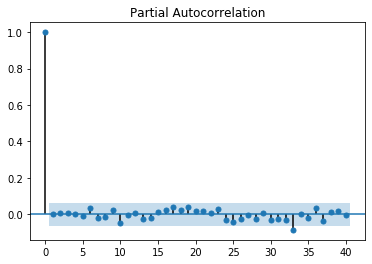

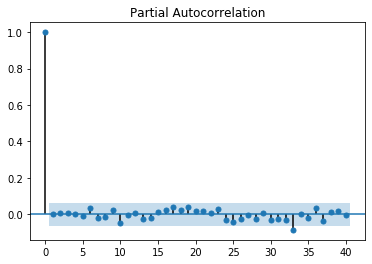

In [32]:
# 偏自己相関
tsaplots.plot_pacf(res_d0[1:], lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

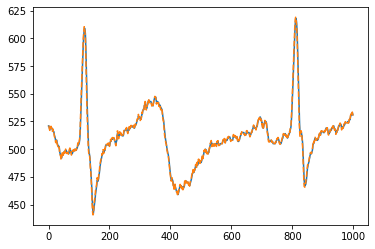

In [35]:
# 将来予測
# トレンドが捉えられていない
# 循環変動も捉えられていない

# 原系列の表示
plt.plot(df_target.values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(3, 0, 2)による予測値を含めた系列の表示
# ARモデルの時とpredictの挙動が異なるので要注意
plt.plot(results_d0.predict(1, len(df_target)).values, 
         '--', label='forecast')

<BarContainer object of 999 artists>

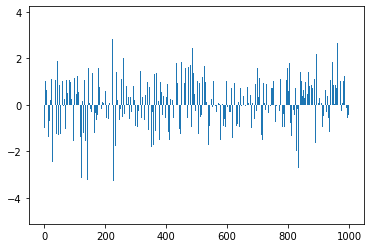

In [38]:
# 階差1をとったモデル(p=4,d=1,q=1)
model_d1 = ARIMA(df_target, (4, 1, 1))
results_d1 = model_d1.fit()
res_d1 = results_d1.resid
# 残差の出力
plt.bar(range(len(res_d1)), res_d1)

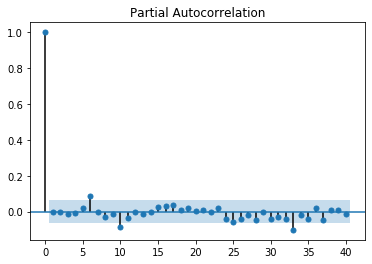

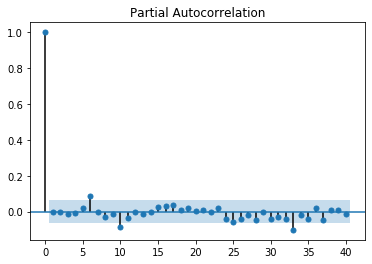

In [39]:
# 偏自己相関
tsaplots.plot_pacf(res_d1, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

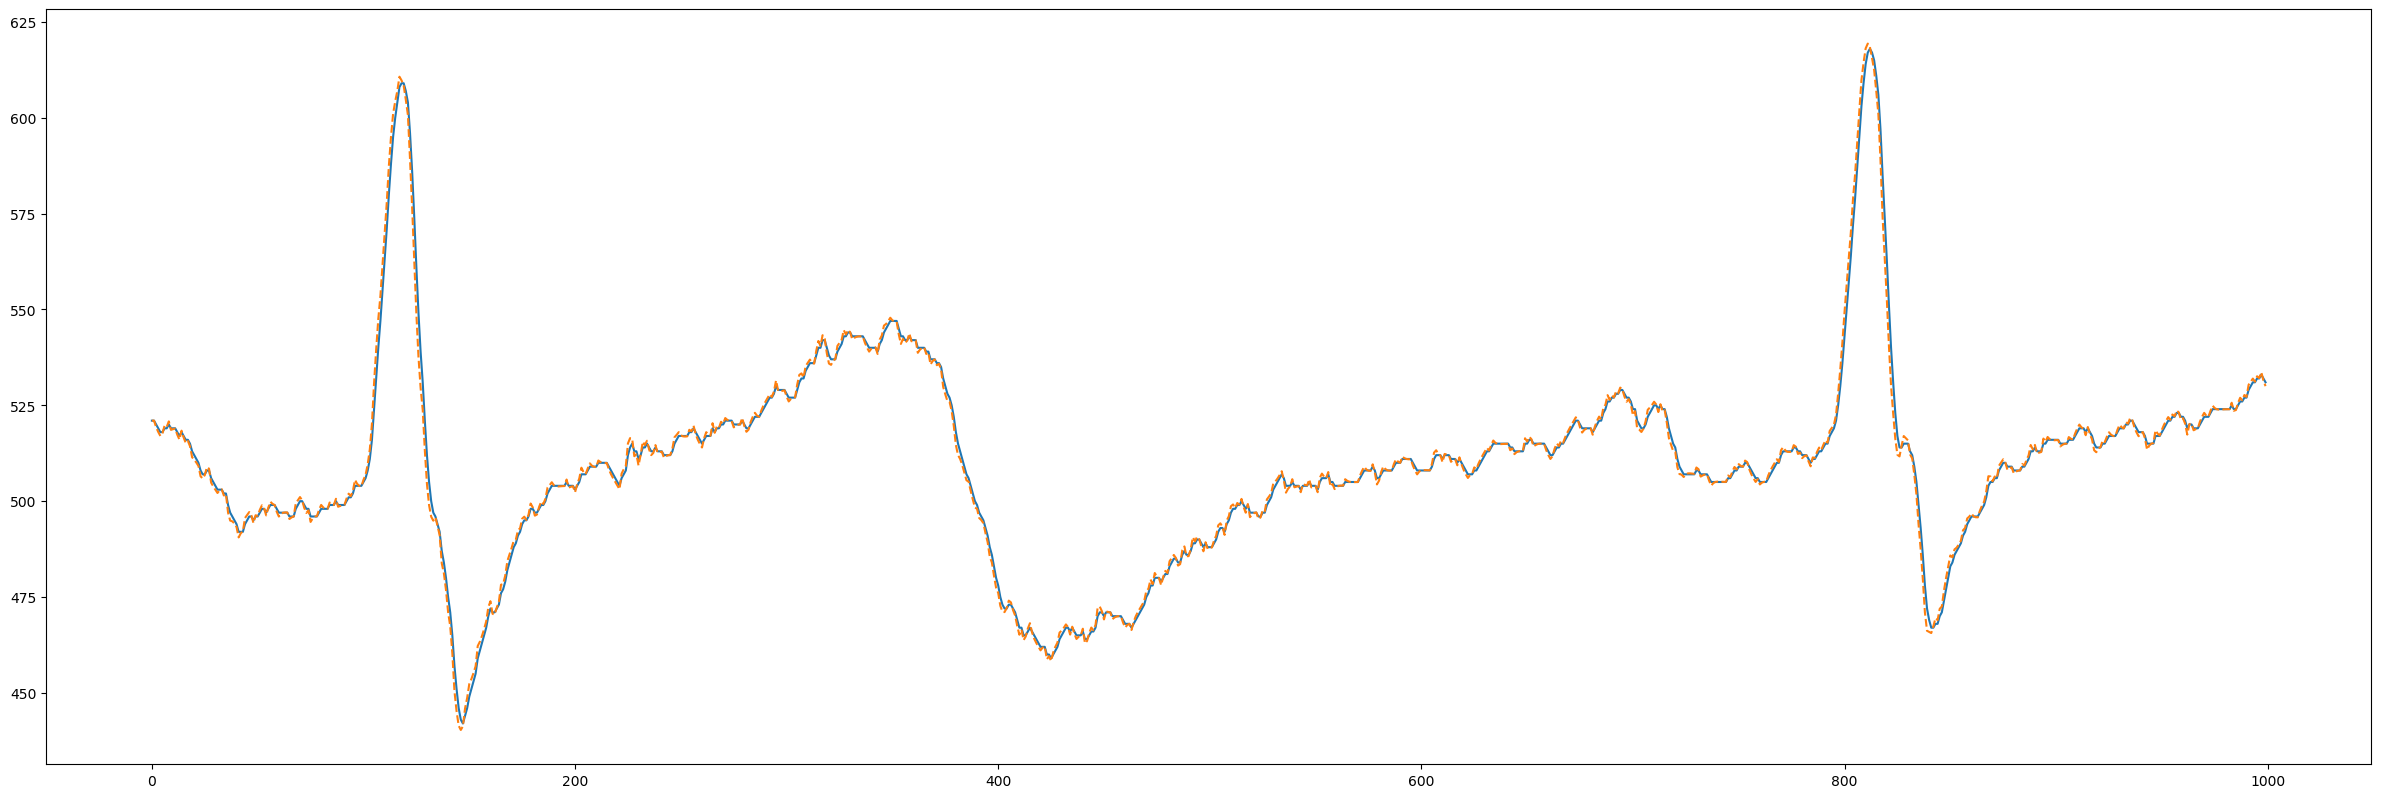

In [42]:
plt.figure(figsize=(30, 10), dpi=100)
# 将来予測
# トレンドは捉えらている

# 原系列の表示
plt.plot(df_target.values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(4, 1, 1)による予測値を含めた系列の表示
# 階差をとっているためインサンプルを
# 元データの形に戻すためtypオプションに'levels'を指定している
plt.plot(results_d1.predict(1, len(df_target), typ='levels').values, 
         '--', label='forecast')

In [43]:
def create_data(data_length, ar1 = 1, set_std=1, y0 = 0, random_seed=555):
    np.random.seed(random_seed)
    cur_y = y0
    val_list = []
    y_t2 = 0
    e_m1 = np.random.normal(loc=0, scale=set_std)
    
    for i in range(data_length):
        val_list.append(cur_y)
        if i > 0:
            y_t2 = val_list[-2]
        e_0 = np.random.normal(loc=0, scale=set_std)
        cur_y = 0.5 + cur_y + ar1 * (cur_y - y_t2) - 2*e_m1
        e_m1 = e_0
        
    return val_list

In [44]:
# データの作成
data_num = 1000
ar1 = 0.3
set_std = 5

base_data = create_data(data_num, ar1=ar1, set_std=set_std)

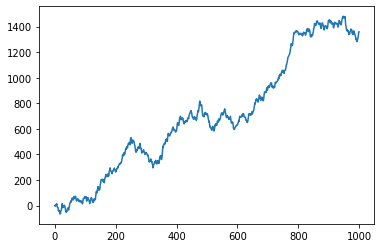

In [45]:
plt.plot(base_data)

<BarContainer object of 699 artists>

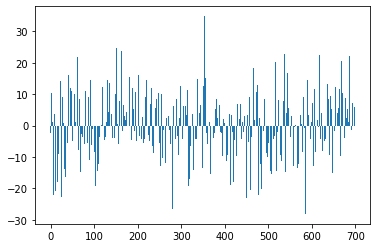

In [46]:
model_extra = ARIMA(base_data[:int(len(base_data)*0.7)], (1, 1, 2))
results_extra = model_extra.fit()
res_extra = results_extra.resid
# 残差の出力
plt.bar(range(len(res_extra)), res_extra)

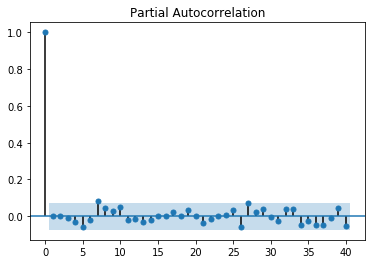

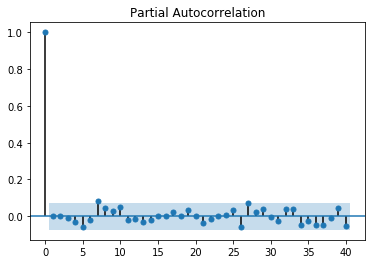

In [47]:
# 偏自己相関
tsaplots.plot_pacf(res_extra, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

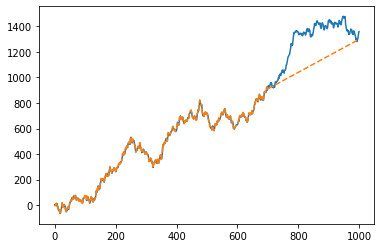

In [48]:
plt.plot(base_data, label='observation')
plt.plot(results_extra.predict(1,len(base_data), typ='levels'), 
         '--', label='forecast')

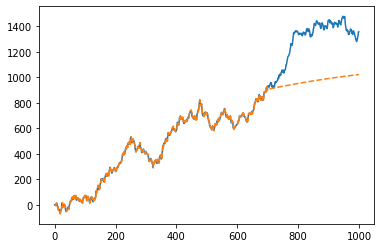

In [51]:
from statsmodels.tsa.ar_model import AR

model = AR(base_data[:int(len(base_data)*0.7)])
results = model.fit(maxlag=15)

plt.plot(base_data, label='observation')
# np.hstackはnp.concatenateでもよい
plt.plot(np.hstack([base_data[:15], 
                    results.fittedvalues, 
                    results.predict(int(len(base_data)*0.7), len(base_data), dynamic = True)]), 
         '--', label='forecast')

# SARIMAモデル

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 12

# SARIMAX(p=2,d=1,q=2; P=1,D=1,Q=1,s=12)モデルの当てはめ
result = SARIMAX(
    df_target, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,seasonal), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                 A2   No. Observations:                 1000
Model:             SARIMAX(2, 1, 2)x(1, 1, 1, 12)   Log Likelihood               -1472.667
Date:                            Fri, 27 Dec 2019   AIC                           2959.335
Time:                                    23:31:48   BIC                           2993.490
Sample:                                         0   HQIC                          2972.334
                                           - 1000                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7595      0.033     53.787      0.000       1.695       1.824
ar.L2         -0.8015      0.029   

<BarContainer object of 1000 artists>

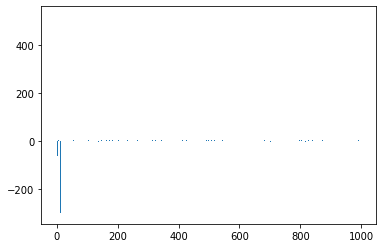

In [56]:
# 残差の抽出
res = result.resid
# 残差の出力
plt.bar(range(len(res)), res)

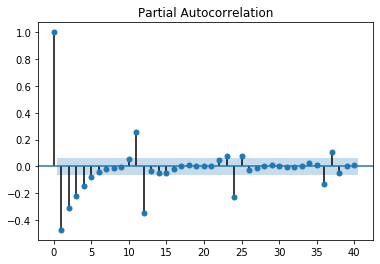

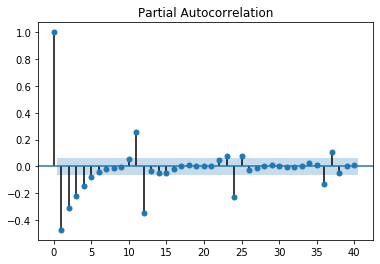

In [57]:
# 偏自己相関
tsaplots.plot_pacf(res, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

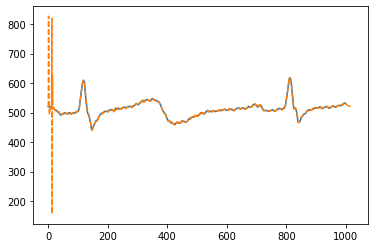

In [63]:
# 将来予測
plt.plot(df_target.values, label="observation")
plt.plot(np.hstack([df_target.values[0], 
                    result.fittedvalues[1:], 
                    result.forecast(24)]), 
         '--', label="forecast")

# 単位根過程

In [65]:
# ADF 検定
# トレンド項あり（2次まで）、定数項あり
ctt = stattools.adfuller(df_target, regression="ctt")
# トレンド項あり（1次）、定数項あり
ct = stattools.adfuller(df_target, regression="ct")
# トレンド項なし、定数項あり
c = stattools.adfuller(df_target, regression="c")
# トレンド項なし、定数項なし
nc = stattools.adfuller(df_target, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-5.068487871471147, 0.0007814190675780347, 12, 987, {'1%': -4.382907946995653, '5%': -3.8383864295126875, '10%': -3.5569733008709474}, 2904.8459506750846)
ct:
(-5.004794495176949, 0.00020164986188992963, 12, 987, {'1%': -3.967971661746561, '5%': -3.4149475497389377, '10%': -3.1296737078728354}, 2903.494114520011)
c:
(-4.926513062910688, 3.0958710980776224e-05, 12, 987, {'1%': -3.4369927443074353, '5%': -2.864472756705845, '10%': -2.568331546097238}, 2902.306454450379)
nc:
(-0.20110132286311413, 0.6135012216123483, 8, 991, {'1%': -2.567999798122558, '5%': -1.9412744336703807, '10%': -1.6165547253491828}, 2923.9209815513977)


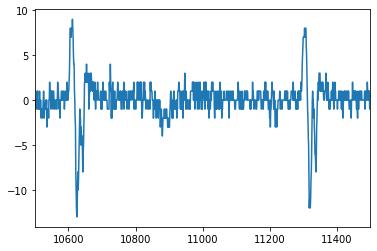

In [67]:
y_diff = df_target.diff().dropna()
y_diff.plot()

In [68]:
# トレンド項あり（2次まで）、定数項あり
ctt = stattools.adfuller(y_diff, regression="ctt")
# トレンド項あり（1次）、定数項あり
ct = stattools.adfuller(y_diff, regression="ct")
# トレンド項なし、定数項あり
c = stattools.adfuller(y_diff, regression="c")
# トレンド項なし、定数項なし
nc = stattools.adfuller(y_diff, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-9.359590242186925, 1.5755355588596897e-13, 7, 991, {'1%': -4.382860256751456, '5%': -3.8383621734339877, '10%': -3.5569582904019383}, 2924.541832161086)
ct:
(-9.363886979541268, 5.5529235531363746e-14, 7, 991, {'1%': -3.967934402399965, '5%': -3.41492951994395, '10%': -3.129663101346273}, 2922.5504151462956)
c:
(-9.364638709724835, 7.658526961245186e-16, 7, 991, {'1%': -3.4369658620871286, '5%': -2.8644609013346485, '10%': -2.56832523159495}, 2920.5523998078297)
nc:
(-9.369646564378469, 2.5202690477950716e-16, 7, 991, {'1%': -2.567999798122558, '5%': -1.9412744336703807, '10%': -1.6165547253491828}, 2918.5652821715557)


# VARモデル

In [69]:
from statsmodels.tsa.api import VAR, DynamicVAR

In [70]:
y_diff = df_target.diff().diff().dropna()

In [71]:
# トレンド項あり（2次まで）、定数項あり
ctt = stattools.adfuller(y_diff, regression="ctt")
# トレンド項あり（1次）、定数項あり
ct = stattools.adfuller(y_diff, regression="ct")
# トレンド項なし、定数項あり
c = stattools.adfuller(y_diff, regression="c")
# トレンド項なし、定数項なし
nc = stattools.adfuller(y_diff, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-12.578899841839275, 1.5568638542438382e-20, 11, 986, {'1%': -4.382919930209609, '5%': -3.8383925243505312, '10%': -3.5569770725465446}, 2969.6181940437027)
ct:
(-12.585439632128665, 4.940648603665748e-20, 11, 986, {'1%': -3.967981023970308, '5%': -3.414952080093166, '10%': -3.129676372971879}, 2967.618864246947)
c:
(-12.591976164086086, 1.812842421320796e-23, 11, 986, {'1%': -3.4369994990319355, '5%': -2.8644757356011743, '10%': -2.5683331327427803}, 2965.635389937451)
nc:
(-12.598446657093904, 5.509938023805771e-23, 11, 986, {'1%': -2.5680112763681398, '5%': -1.9412758424573557, '10%': -1.6165533939615695}, 2963.6357068831817)


In [76]:
# モデルの作成
model_diff = VAR(y_diff)

# 最適なハイパーパラメタ（ラグの次数）の探索
model_diff.select_order(10).summary()

/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: Only gave one variable to VAR